## Problem Statement
Jamboree has helped thousands to make it to top colleges abroad. Be it GMAT, GRE or SAT, their unique problem-solving methods ensure maximum scores with minimum effort.

They recently launched a feature where students/learners can come to their website and check their probability of getting into the IVY league college. This feature estimates the chances of graduate admission from an Indian perspective.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
raw_data = pd.read_csv('Jamboree_Admission.csv')

In [3]:
raw_data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
for i in raw_data.columns:
  print(f'Unique values in {i} feature are:')
  print(raw_data[i].unique())
  print("="*100)

Unique values in Serial No. feature are:
[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 236 2

In [5]:
raw_data.drop_duplicates(inplace = True)

In [6]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [7]:
raw_data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [8]:
raw_data['Serial No.'] = raw_data['Serial No.'].astype('category')

In [9]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Serial No.         500 non-null    category
 1   GRE Score          500 non-null    int64   
 2   TOEFL Score        500 non-null    int64   
 3   University Rating  500 non-null    int64   
 4   SOP                500 non-null    float64 
 5   LOR                500 non-null    float64 
 6   CGPA               500 non-null    float64 
 7   Research           500 non-null    int64   
 8   Chance of Admit    500 non-null    float64 
dtypes: category(1), float64(4), int64(4)
memory usage: 52.4 KB


In [10]:
raw_data.isna().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

* No Null values are present in the dataset.

In [11]:
raw_data.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [12]:
raw_data.columns = ['Serial_No','GRE_score','TOEFL_score','university_rating','SOP','LOR','CGPA','Research','chance_of_admit']

### Let's check for the outliers and distribution of the features

## Chance of Admit Feature

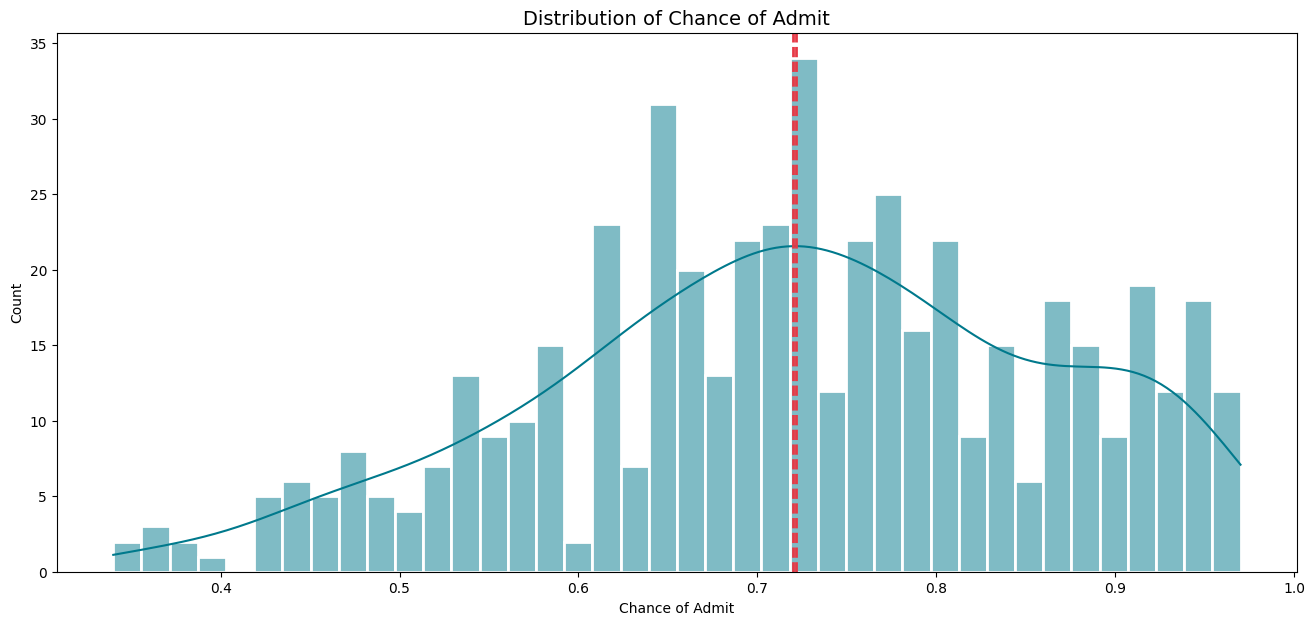

In [13]:
plt.figure(figsize = (16,7))
sns.histplot(data = raw_data, x = 'chance_of_admit',kde = True,bins = 40,color='#00798C', edgecolor='white', linewidth=2)
mean_chance_of_admit = np.mean(raw_data['chance_of_admit'])
median_chance_of_admit = np.median(raw_data['chance_of_admit'])
plt.axvline(median_chance_of_admit, color='#E63946', linestyle='dashed', linewidth=2, label=f'Median Chance of Admit: {median_chance_of_admit:.2f}')
plt.axvline(mean_chance_of_admit, color='#E63946', linestyle='dashed', linewidth=2, label=f'Mean Chance of Admit: {mean_chance_of_admit:.2f}')
plt.xlabel('Chance of Admit')
plt.title('Distribution of Chance of Admit',fontsize = 14)
plt.show()

In [14]:
# Test of Normal distribution
'''
H0 : Data appears to be Normally Distributed
H1 : Data does not appear to be normally distributed
'''
from scipy.stats import shapiro
chance_of_admit_data = raw_data['chance_of_admit']
s_stat, p_val = shapiro(chance_of_admit_data)
alpha = 0.05
print(f'p value is : {p_val}')
if p_val > alpha:
  print("The data appears to be normally distributed (fail to reject the null hypothesis)")
else:
  print("The data does not appear to be normally distributed (reject the null hypothesis)")

p value is : 2.654237050592201e-06
The data does not appear to be normally distributed (reject the null hypothesis)


* Chance of Admit data is not normally distributed.

## GRE Scores

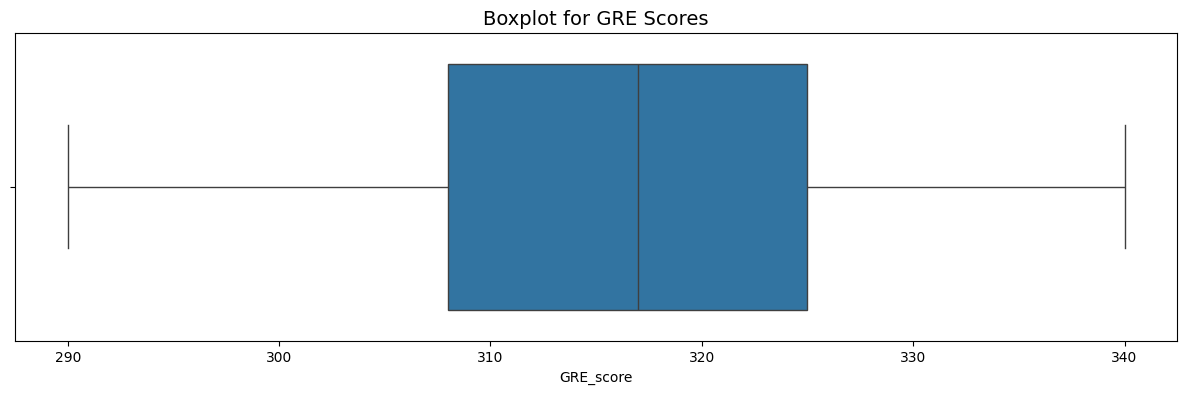

In [15]:
plt.figure(figsize = (15,4))
sns.boxplot(x = raw_data['GRE_score'])
plt.title('Boxplot for GRE Scores',fontsize = 14)
plt.show()

* No outliers present in the dataset

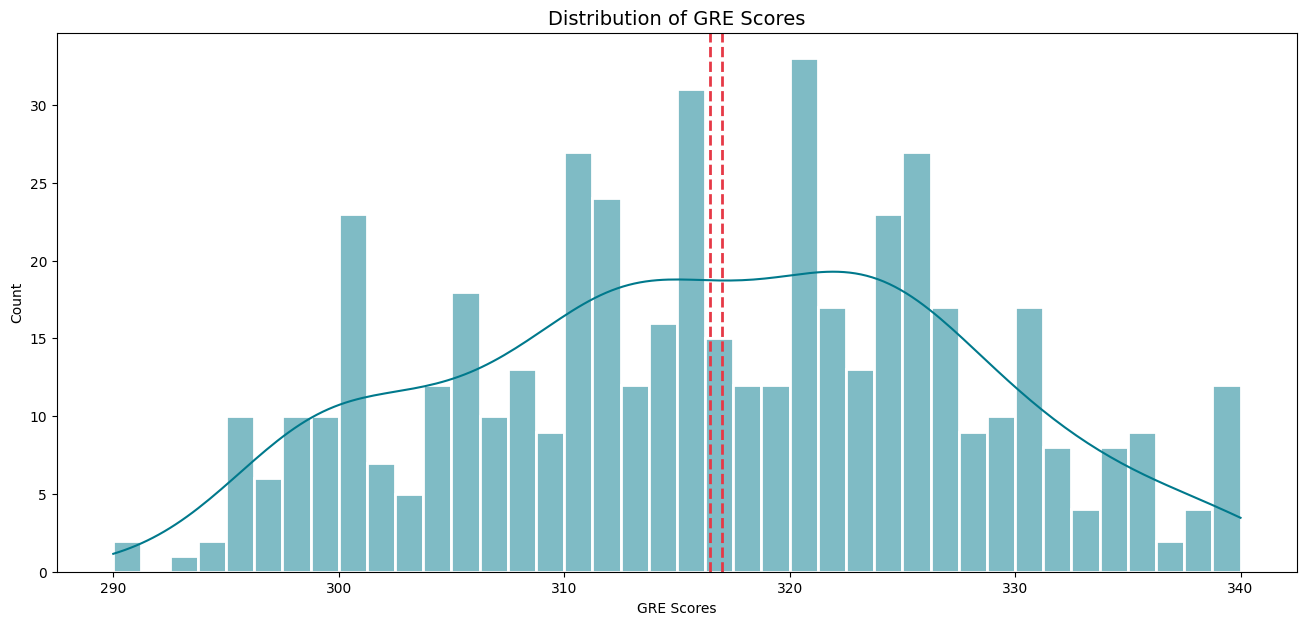

In [16]:
plt.figure(figsize = (16,7))
sns.histplot(data = raw_data, x = 'GRE_score',kde = True,bins = 40,color='#00798C', edgecolor='white', linewidth=2)
mean_gre_score = np.mean(raw_data['GRE_score'])
median_gre_score = np.median(raw_data['GRE_score'])
plt.axvline(median_gre_score, color='#E63946', linestyle='dashed', linewidth=2, label=f'Median GRE Score: {median_gre_score:.2f}')
plt.axvline(mean_gre_score, color='#E63946', linestyle='dashed', linewidth=2, label=f'Mean GRE Score: {mean_gre_score:.2f}')
plt.xlabel('GRE Scores')
plt.title('Distribution of GRE Scores',fontsize = 14)
plt.show()

* Visually GRE scores are normally distributed
* Let's check it statistically by using Shapiro Wilk test

In [17]:
# Test of Normal distribution
'''
H0 : Data appears to be Normally Distributed
H1 : Data does not appear to be normally distributed
'''
from scipy.stats import shapiro
gre_score_data = raw_data['GRE_score']
s_stat, p_val = shapiro(gre_score_data)
alpha = 0.05
print(f'p value is : {p_val}')
if p_val > alpha:
  print("The data appears to be normally distributed (fail to reject the null hypothesis)")
else:
  print("The data does not appear to be normally distributed (reject the null hypothesis)")

p value is : 8.212661487050354e-05
The data does not appear to be normally distributed (reject the null hypothesis)


* Final verdict is GRE scores data is not normally distributed.

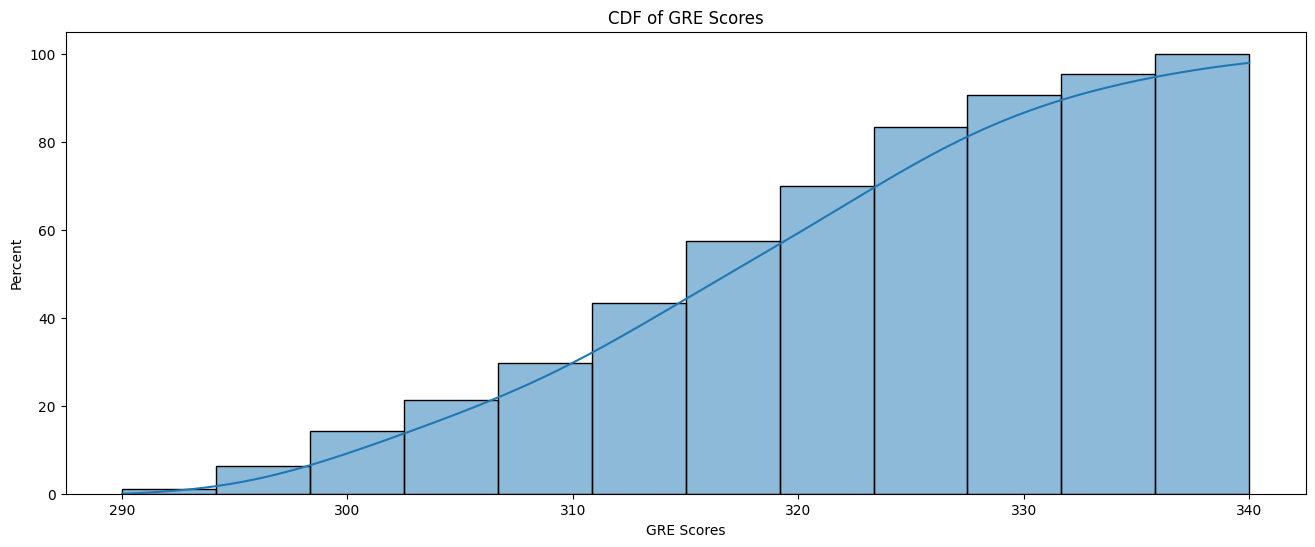

In [18]:
plt.figure(figsize = (16,6))
sns.histplot(data = raw_data, x = 'GRE_score',kde = True , cumulative = True , stat = 'percent')
plt.xlabel('GRE Scores')
plt.title('CDF of GRE Scores')
plt.show()

* 60% students have GRE score less than 320.


### Bivariate analysis on chance of admit and GRE scores

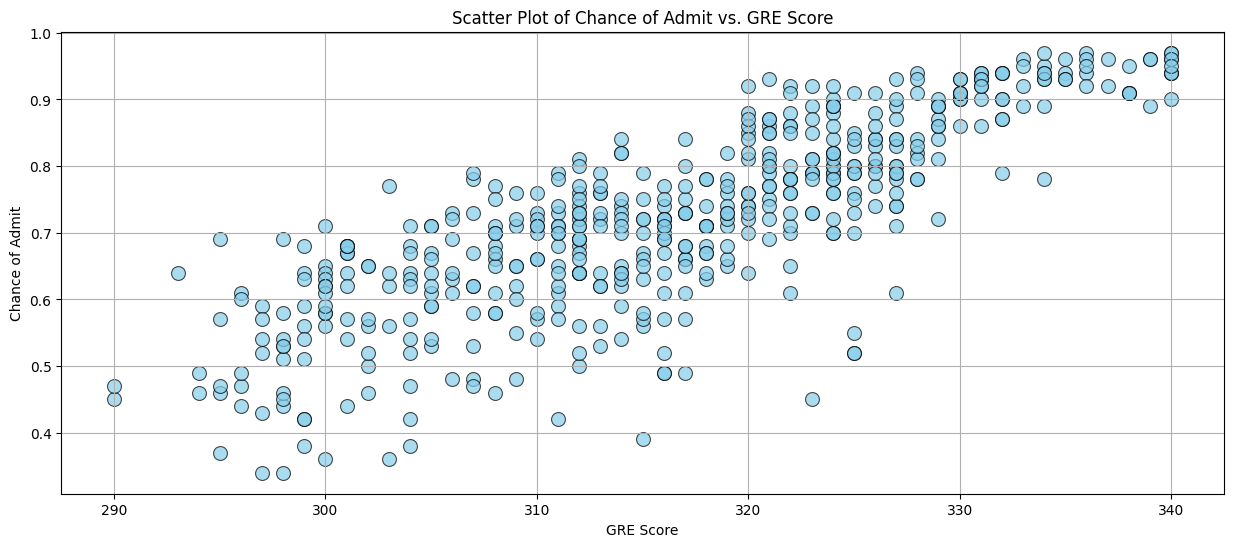

In [19]:
plt.figure(figsize = (15,6))
# Create a scatter plot
sns.scatterplot(x=raw_data['GRE_score'], y=raw_data['chance_of_admit'], s=100, color='skyblue', edgecolor='black', alpha=0.7)

# Add labels and title
plt.title('Scatter Plot of Chance of Admit vs. GRE Score')
plt.xlabel('GRE Score')
plt.ylabel('Chance of Admit')

# Add grid
plt.grid(True)

# Show the plot
plt.show()

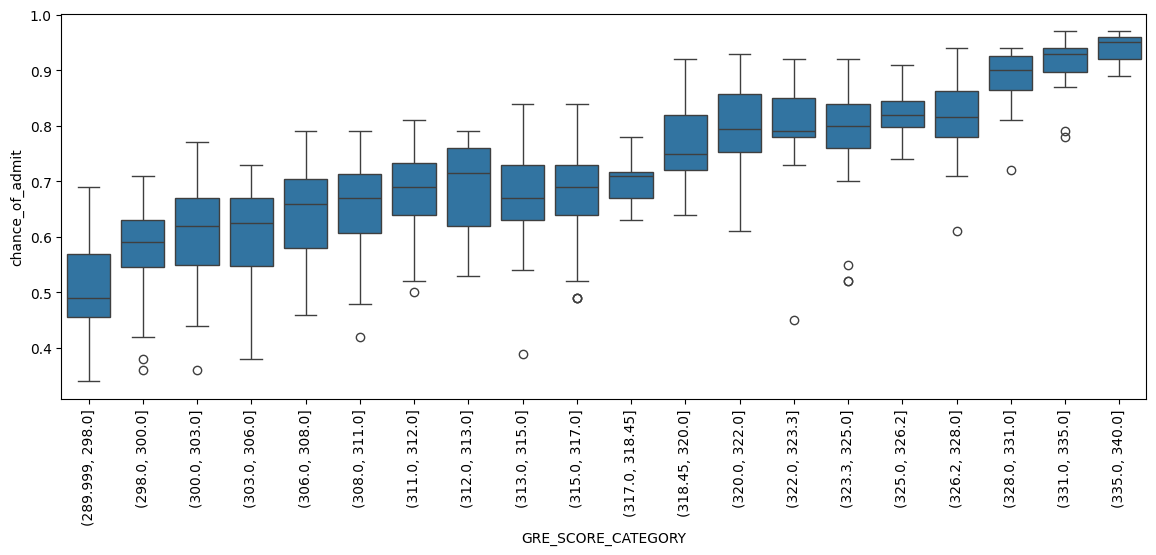

In [20]:
raw_data["GRE_SCORE_CATEGORY"]=pd.qcut(raw_data["GRE_score"],20)
plt.figure(figsize=(14,5))
sns.boxplot(y = raw_data["chance_of_admit"], x = raw_data["GRE_SCORE_CATEGORY"])
plt.xticks(rotation = 90)
plt.show()

In [21]:
from scipy.stats import spearmanr,pearsonr

In [22]:
pearsonr(raw_data['GRE_score'],raw_data['chance_of_admit'])

PearsonRResult(statistic=0.8103506354632598, pvalue=1.0884036862479007e-117)

In [23]:
spearmanr(raw_data['GRE_score'],raw_data['chance_of_admit'])

SignificanceResult(statistic=0.8222011595365538, pvalue=5.734552105475668e-124)

* From scatter plot and boxplot it can be said that **GRE Socre and Chance of Admission** are **positively correlated**.
* In both cases they show correlation of more than **80%**.

## TOEFL Score and Chance of Admit

In [24]:
raw_data.columns

Index(['Serial_No', 'GRE_score', 'TOEFL_score', 'university_rating', 'SOP',
       'LOR', 'CGPA', 'Research', 'chance_of_admit', 'GRE_SCORE_CATEGORY'],
      dtype='object')

<ipython-input-25-a1ee5cdf5132>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


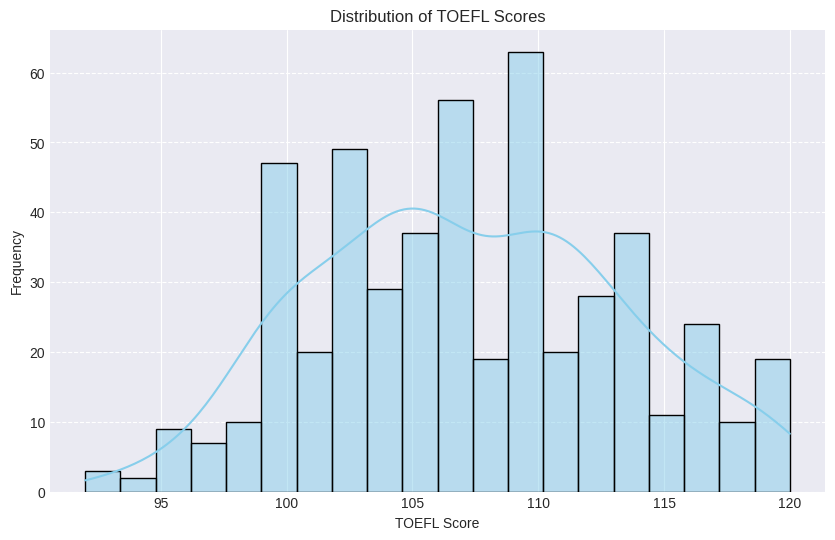

In [25]:
# Set the style for the plot
plt.style.use('seaborn-darkgrid')

# Create the histogram plot
plt.figure(figsize=(10, 6))
sns.histplot(data=raw_data, x='TOEFL_score', bins=20, kde=True, color='skyblue')

# Add labels and title
plt.xlabel('TOEFL Score')
plt.ylabel('Frequency')
plt.title('Distribution of TOEFL Scores')

# Add grid lines
plt.grid(axis='y', linestyle='--')

# Show the plot
plt.show()

#### Conducting Shapiro Wilk Test for TOEFL score

In [26]:
toefl_scores = raw_data['TOEFL_score']

# Perform the Shapiro-Wilk test
statistic, p_value = shapiro(toefl_scores)

# Print the test results
print(f"Shapiro-Wilk Test Statistic: {statistic}")
print(f"P-value: {p_value}")

# Interpret the results
alpha = 0.05  # significance level
if p_value > alpha:
    print("The data appears to be normally distributed (fail to reject H0)")
else:
    print("The data does not appear to be normally distributed (reject H0)")

Shapiro-Wilk Test Statistic: 0.9858347177505493
P-value: 8.730924309929833e-05
The data does not appear to be normally distributed (reject H0)


* The TOEFL scores data isn't Normally distributed.

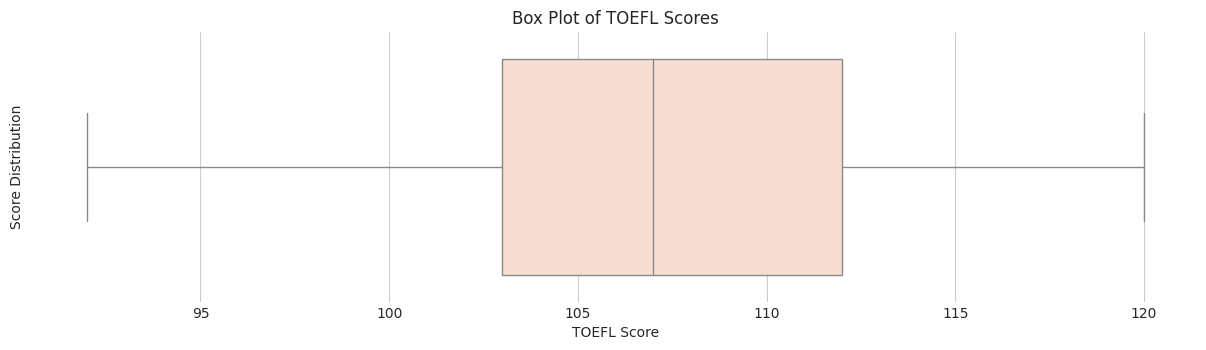

In [27]:
sns.set_style("whitegrid")
sns.set_palette("Reds")

# Create the box plot
plt.figure(figsize=(15, 3.5))
sns.boxplot(data=raw_data, x='TOEFL_score')

# Add labels and title
plt.xlabel('TOEFL Score')
plt.ylabel('Score Distribution')
plt.title('Box Plot of TOEFL Scores')

# Show the plot
plt.show()

* No outliers present in the TOEFL data.

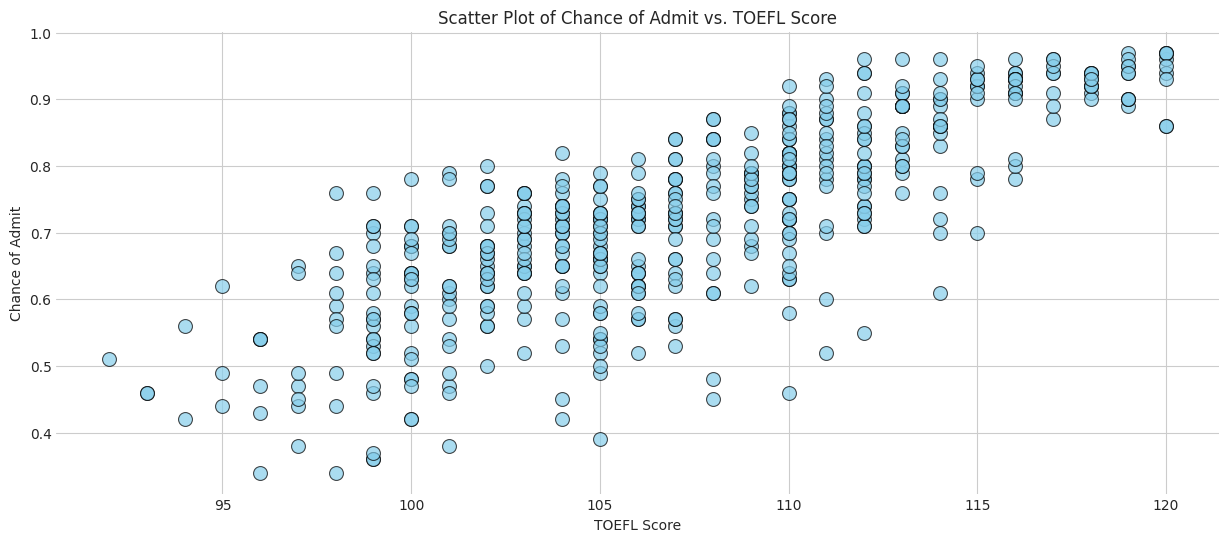

In [28]:
plt.figure(figsize = (15,6))
# Create a scatter plot
sns.scatterplot(x=raw_data['TOEFL_score'], y=raw_data['chance_of_admit'], s=100, color='skyblue', edgecolor='black', alpha=0.7)

# Add labels and title
plt.title('Scatter Plot of Chance of Admit vs. TOEFL Score')
plt.xlabel('TOEFL Score')
plt.ylabel('Chance of Admit')

# Add grid
plt.grid(True)

# Show the plot
plt.show()

* From the scatterplot it is evident TOEFL score and chance of admit have low correlation.

#### Checking correlation coefficients

In [29]:
pearsonr(raw_data['chance_of_admit'],raw_data['TOEFL_score'])

PearsonRResult(statistic=0.792227614305083, pvalue=6.729926762330067e-109)

In [30]:
spearmanr(raw_data['chance_of_admit'],raw_data['TOEFL_score'])

SignificanceResult(statistic=0.7936341632036854, pvalue=1.504956427966445e-109)

* Chance of Admit and TOEFL score both have Strong positive correlation.

## CGPA and chance of Admission

<ipython-input-31-b754dbf2e023>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


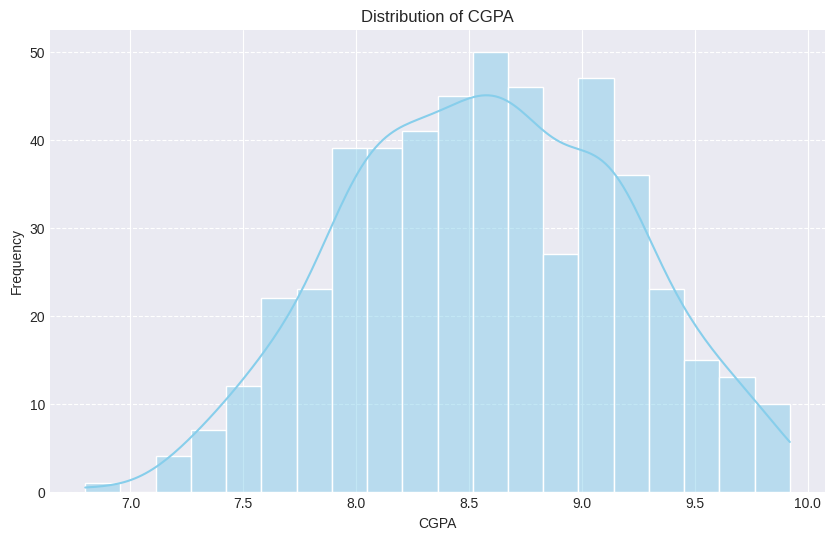

In [31]:
plt.style.use('seaborn-darkgrid')

# Create the histogram plot for CGPA
plt.figure(figsize=(10, 6))
sns.histplot(data=raw_data, x='CGPA', bins=20, kde=True, color='skyblue')

# Add labels and title
plt.xlabel('CGPA')
plt.ylabel('Frequency')
plt.title('Distribution of CGPA')

# Add grid lines
plt.grid(axis='y', linestyle='--')

# Show the plot
plt.show()

In [32]:
# Test of Normality for CGPA Using Shapiro Wilk Test
statistic, p_value = shapiro(raw_data['CGPA'])

# Print the test results
print(f"Shapiro-Wilk Test Statistic: {statistic}")
print(f"P-value: {p_value}")

# Interpret the results
alpha = 0.05  # significance level
if p_value > alpha:
    print("The data appears to be normally distributed (fail to reject H0)")
else:
    print("The data does not appear to be normally distributed (reject H0)")

Shapiro-Wilk Test Statistic: 0.9922108054161072
P-value: 0.010292120277881622
The data does not appear to be normally distributed (reject H0)


* CGPA data is not Normally Distributed.

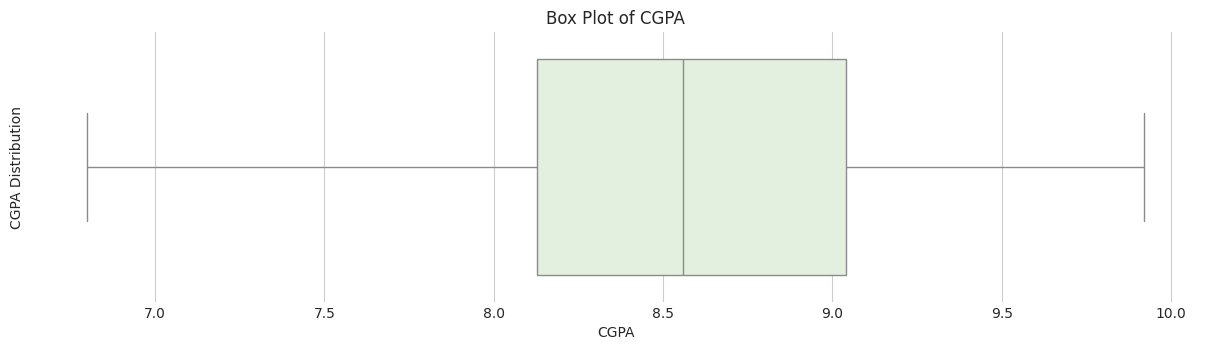

In [33]:
# Set the style and color palette for box plot
sns.set_style("whitegrid")
sns.set_palette("Greens")

# Create the box plot for CGPA
plt.figure(figsize=(15, 3.5))
sns.boxplot(data=raw_data, x='CGPA')

# Add labels and title
plt.xlabel('CGPA')
plt.ylabel('CGPA Distribution')
plt.title('Box Plot of CGPA')

# Show the plot
plt.show()

* No outliers present in the CGPA data.

<ipython-input-34-4f580f8b526a>:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=raw_data['CGPA'], y=raw_data['chance_of_admit'], s=100, palette='viridis', edgecolor='black', alpha=0.7)


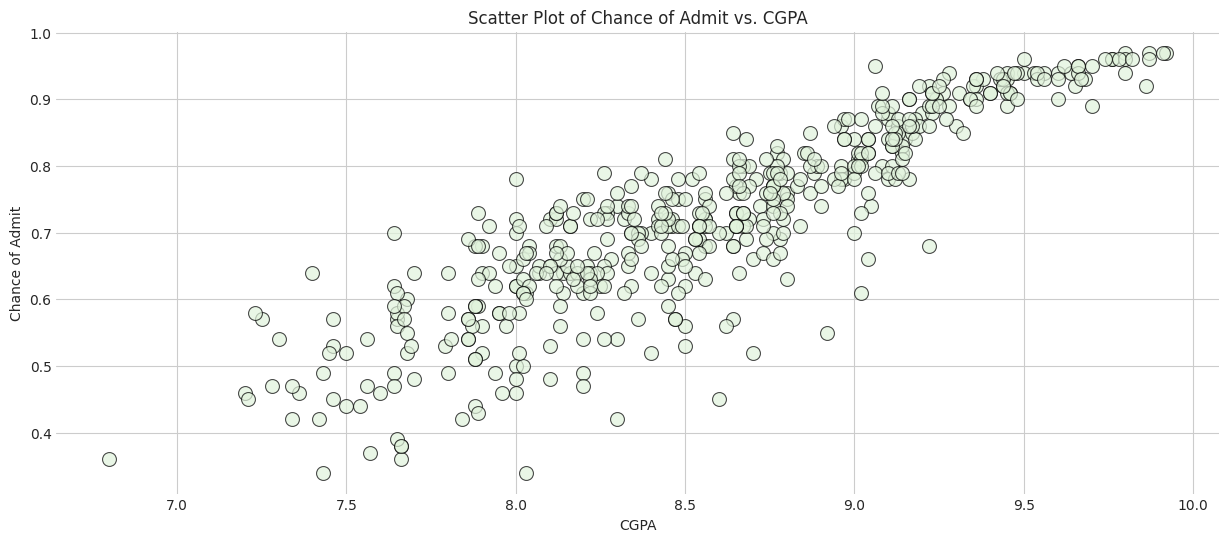

In [34]:
plt.figure(figsize=(15, 6))
sns.scatterplot(x=raw_data['CGPA'], y=raw_data['chance_of_admit'], s=100, palette='viridis', edgecolor='black', alpha=0.7)

# Add labels and title
plt.title('Scatter Plot of Chance of Admit vs. CGPA')
plt.xlabel('CGPA')
plt.ylabel('Chance of Admit')

# Add grid
plt.grid(True)

# Show the plot
plt.show()

In [35]:
pearsonr(raw_data['chance_of_admit'],raw_data['CGPA'])

PearsonRResult(statistic=0.8824125749045744, pvalue=3.3965448587112374e-165)

* CGPA data and Chance of Admit have Strong Positive Correlation.

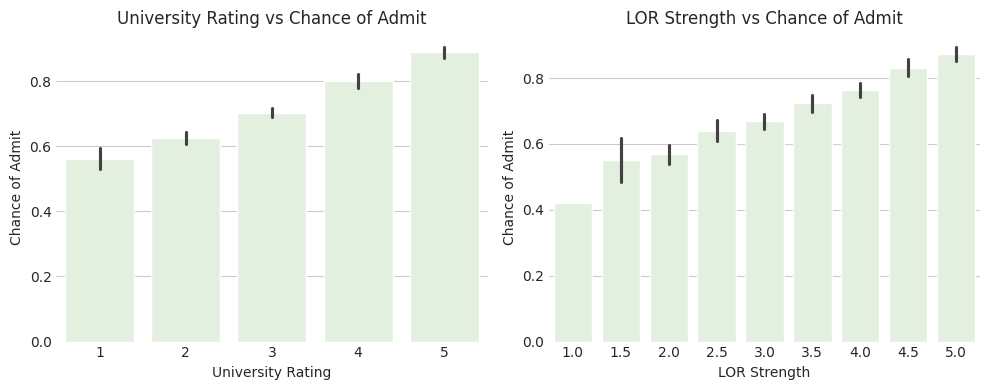

In [36]:
plt.show()

fig, axs = plt.subplots(1, 2, figsize=(10, 4))

sns.barplot(data=raw_data,x='university_rating',y='chance_of_admit',ax=axs[0])
axs[0].set_title('University Rating vs Chance of Admit')
axs[0].set_xlabel('University Rating')
axs[0].set_ylabel('Chance of Admit')

sns.barplot(data=raw_data,x='LOR',y='chance_of_admit',ax=axs[1])
axs[1].set_title('LOR Strength vs Chance of Admit')
axs[1].set_xlabel('LOR Strength')
axs[1].set_ylabel('Chance of Admit')


plt.tight_layout()
plt.show()

* It can be observed that people with higher university rating and higher LOR rating  have got high chance of admit.

### Research vs Chance of Admit

In [37]:
raw_data.columns

Index(['Serial_No', 'GRE_score', 'TOEFL_score', 'university_rating', 'SOP',
       'LOR', 'CGPA', 'Research', 'chance_of_admit', 'GRE_SCORE_CATEGORY'],
      dtype='object')

<ipython-input-38-d92fd771b484>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=raw_data, x='Research', y='chance_of_admit', palette='pastel', ax=ax,width = 0.3)


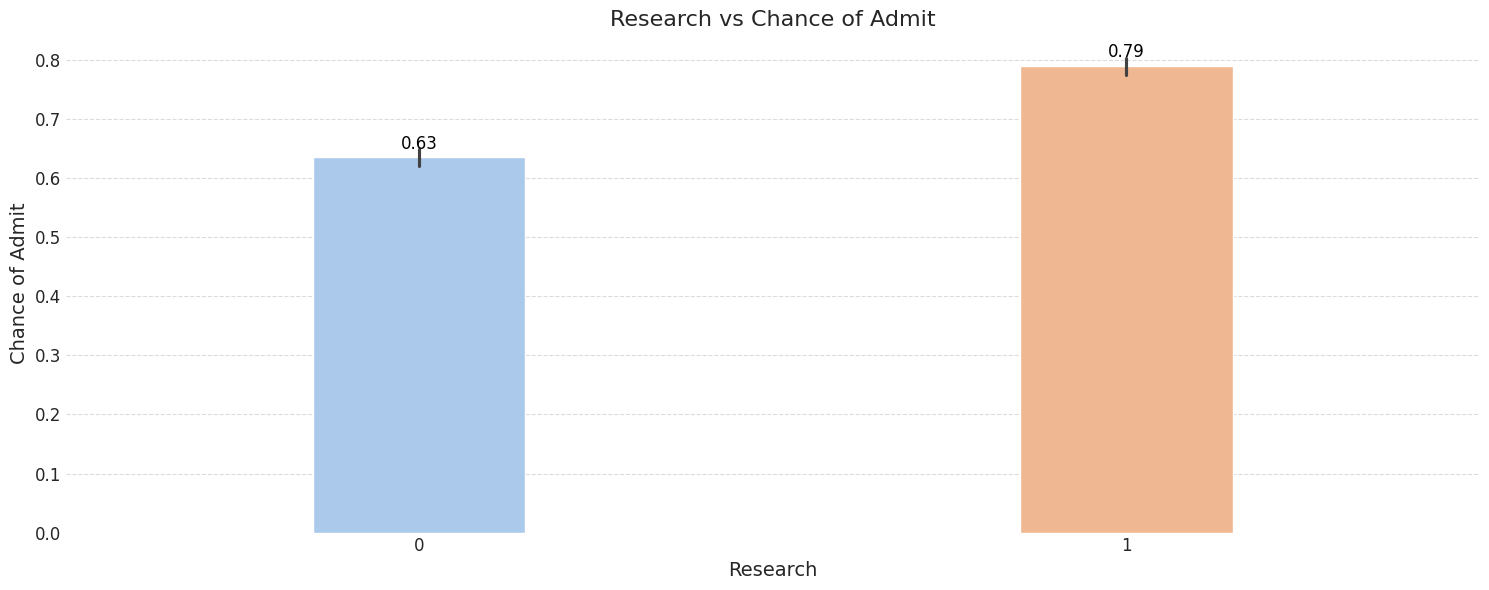

In [38]:
fig, ax = plt.subplots(figsize=(15, 6))

sns.barplot(data=raw_data, x='Research', y='chance_of_admit', palette='pastel', ax=ax,width = 0.3)
ax.set_title('Research vs Chance of Admit', fontsize=16)
ax.set_xlabel('Research', fontsize=14)
ax.set_ylabel('Chance of Admit', fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=12)

# Adding grid lines
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Adding annotations (optional)
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 10),
                textcoords='offset points')

# Show plot
plt.tight_layout()
plt.show()

### Creating New Feature

In [39]:
raw_data.columns

Index(['Serial_No', 'GRE_score', 'TOEFL_score', 'university_rating', 'SOP',
       'LOR', 'CGPA', 'Research', 'chance_of_admit', 'GRE_SCORE_CATEGORY'],
      dtype='object')

In [40]:
raw_data['TotalScore']= (raw_data['GRE_score']*10/340)+(raw_data['TOEFL_score']*10/120)
raw_data['SOP_LOR'] =raw_data['SOP']+raw_data['LOR']

In [41]:
# dropping the Unique counting variable
raw_data.drop(['Serial_No'],axis = 1,inplace = True)

In [42]:
raw_data

,GRE_score,TOEFL_score,university_rating,SOP,LOR,CGPA,Research,chance_of_admit,GRE_SCORE_CATEGORY,TotalScore,SOP_LOR
0,337,118,4,4.5,4.5,9.65,1,0.92,"(335.0, 340.0]",19.745098,9.0
1,324,107,4,4.0,4.5,8.87,1,0.76,"(323.3, 325.0]",18.446078,8.5
2,316,104,3,3.0,3.5,8.00,1,0.72,"(315.0, 317.0]",17.960784,6.5
3,322,110,3,3.5,2.5,8.67,1,0.80,"(320.0, 322.0]",18.637255,6.0
4,314,103,2,2.0,3.0,8.21,0,0.65,"(313.0, 315.0]",17.818627,5.0
...,...,...,...,...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1,0.87,"(331.0, 335.0]",18.764706,8.5
496,337,117,5,5.0,5.0,9.87,1,0.96,"(335.0, 340.0]",19.661765,10.0
497,330,120,5,4.5,5.0,9.56,1,0.93,"(328.0, 331.0]",19.705882,9.5
498,312,103,4,4.0,5.0,8.43,0,0.73,"(311.0, 312.0]",17.759804,9.0


### Seperating Features and Target

In [43]:
X = raw_data.drop(columns = ['chance_of_admit','GRE_score','GRE_SCORE_CATEGORY','TOEFL_score','SOP','LOR'])
y = raw_data['chance_of_admit']

## Train Test Split

In [44]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=1)

# Scaling the Data

In [45]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
# Train data split
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)

# Test data split
X_test = pd.DataFrame(scaler.fit_transform(X_test), columns=X_test.columns)

## Linear Regression

##### Checking the Assumptions

1. Assumption : Linearity Check

In [46]:
'''
Ho : There is no linear correlation between the two variables
Ha: There is linear correlation between the two variables
'''
from scipy.stats import pearsonr
alpha=0.05
cols = X_train.columns
for col in cols:
    print('*'*50)
    pstat,pvalue=pearsonr(X_train[col],y_train)
    print('Column Name:',col)
    if pvalue < alpha:
        print('P value:',pvalue)
        print('*'*50)
        print('Reject Null Hypothesis and we conclude that there\nis linear correlation between the independent and\ndependent variable (Target)')
    else:
        print('Failed to Reject Null Hypothesis')
    print('*'*50)
print('*'*50)

**************************************************
Column Name: university_rating
P value: 8.472734355963263e-56
**************************************************
Reject Null Hypothesis and we conclude that there
is linear correlation between the independent and
dependent variable (Target)
**************************************************
**************************************************
Column Name: CGPA
P value: 2.291029286206592e-112
**************************************************
Reject Null Hypothesis and we conclude that there
is linear correlation between the independent and
dependent variable (Target)
**************************************************
**************************************************
Column Name: Research
P value: 2.6471704101314467e-31
**************************************************
Reject Null Hypothesis and we conclude that there
is linear correlation between the independent and
dependent variable (Target)
******************************************

* All the independent features have Linear Relationship with the Target variable.

## Assumption 2 : Multicolinearity

In [47]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


vif_data = pd.DataFrame()
vif_data["feature"] = X_train.columns


vif_data["VIF"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]


print('VIF Score',vif_data)
print('*'*50)

VIF Score              feature       VIF
0  university_rating  2.908534
1               CGPA  4.554536
2           Research  1.460118
3         TotalScore  3.921523
4            SOP_LOR  2.818255
**************************************************


* VIF Score for all the Independent features is below 5,so we will have a good model

In [48]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

# Training the model
model.fit(X_train,y_train)

LinearRegression()

In [49]:
predictions_train = model.predict(X_train)
predictions_test = model.predict(X_test)

### Assumption 3: Normality of Residuals

<ipython-input-50-0ba1a1199718>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals,color = 'darkblue')


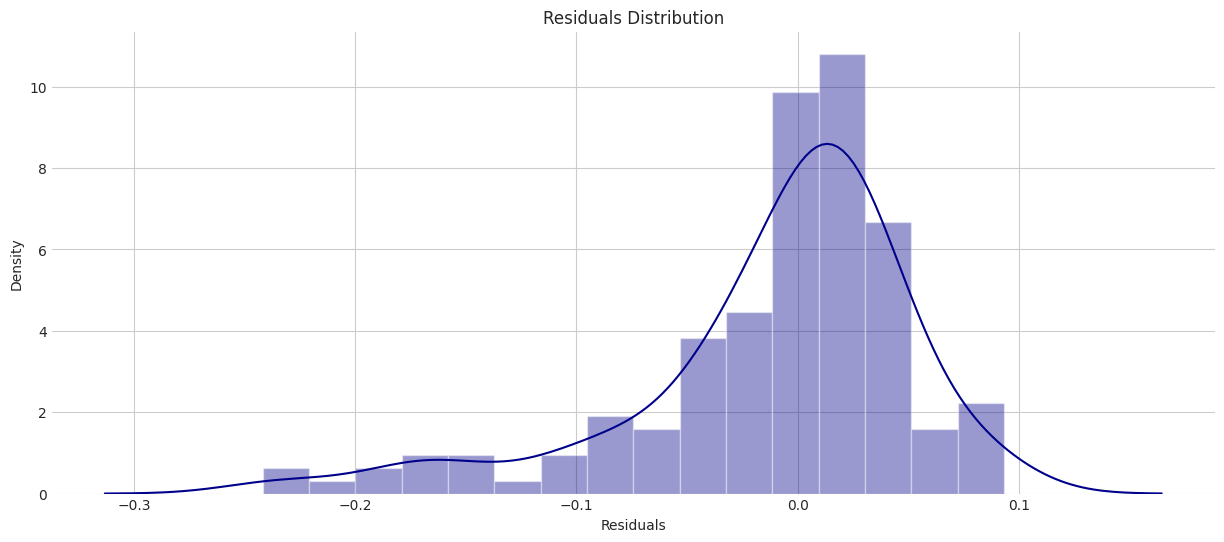

In [50]:
plt.figure(figsize = (15,6))
# Calculate residuals using predictions_test
residuals = y_test - predictions_test

# Plotting residuals distribution
sns.distplot(residuals,color = 'darkblue')
plt.title('Residuals Distribution')
plt.xlabel('Residuals')
plt.ylabel('Density')
plt.show()

In [51]:
'''
H0 : Residuals are Normally Distributed
H1 : Residuals are not Normally Distributed
'''
# Shapiro-Wilk test
stat, p_value = shapiro(residuals)
print(f"Shapiro-Wilk Test Statistic: {stat}, p-value: {p_value}")

Shapiro-Wilk Test Statistic: 0.8696649074554443, p-value: 3.543590976207156e-10


p-value is less than alpha which infers that the Residuals are not Normally distributed.

### Assumption 4 : No Homoscedasticity


In [52]:
residuals_train = predictions_train - y_train
residuals_test = predictions_test - y_test

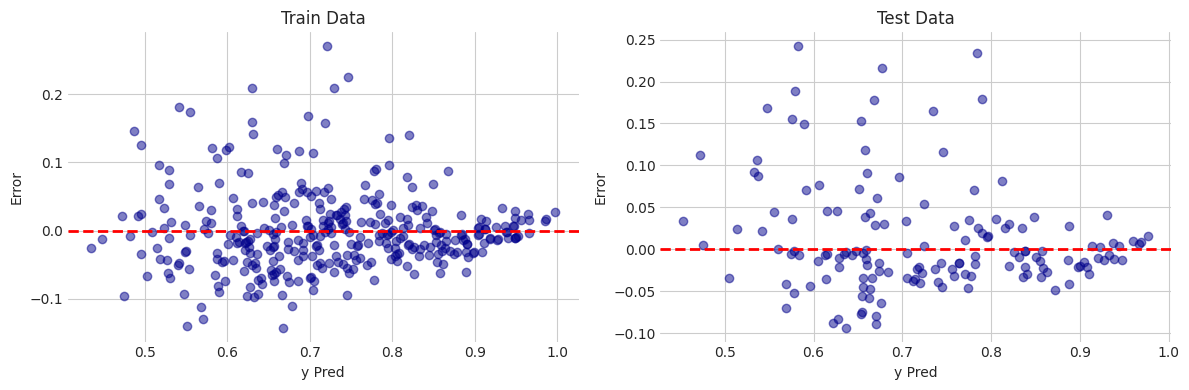

In [53]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

# Plotting the first graph
axes[0].scatter(predictions_train, residuals_train, alpha=0.5,color = 'darkblue')
axes[0].axhline(0, color='red', linestyle='--', linewidth=2)
axes[0].set_title('Train Data')
axes[0].set_xlabel('y Pred')
axes[0].set_ylabel('Error')
axes[0].grid(True)

# Plotting the second graph
axes[1].scatter(predictions_test, residuals_test, alpha=0.5,color = 'darkblue')
axes[1].axhline(0, color='red', linestyle='--', linewidth=2)
axes[1].set_title('Test Data')
axes[1].set_xlabel('y Pred')
axes[1].set_ylabel('Error')
axes[1].grid(True)

# Adjust layout
plt.tight_layout()
plt.show()

### Calculating Metrices

In [54]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [55]:
print("::---------Test Data---------::")
mae = mean_absolute_error(y_test, predictions_test)
mse = mean_squared_error(y_test, predictions_test)
r2_test = r2_score(y_test, predictions_test)

print('Mean Absolute Error:',mae)
print('Mean Squared Error:',mse)
print('R2 Score:',r2_test)
print('*'*50)

::---------Test Data---------::
Mean Absolute Error: 0.044355863120596
Mean Squared Error: 0.004295629681714218
R2 Score: 0.8081899059053868
**************************************************


In [56]:
def AdjustedR2score(R2,n,d):
    return 1-(((1-R2)*(n-1))/(n-d-1))

In [57]:
print("Adjusted R2 score :", AdjustedR2score(r2_score(y_test,predictions_test),len(X),X.shape[1]))

Adjusted R2 score : 0.8062485081918785


* Model Accuracy is 80.6%.

# 2. Polynomial Regression

### Train and Test Split

In [58]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

### Training the model

In [59]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

degree = 2
model = make_pipeline(PolynomialFeatures(degree),StandardScaler(),LinearRegression())

model.fit(X_train,y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [60]:
# Predicting the Values

predictions_train = model.predict(X_train)
predictions_test = model.predict(X_test)

In [61]:

print("::---------Test Data---------::")
mae = mean_absolute_error(y_test,predictions_test)
mse = mean_absolute_error(y_test,predictions_test)
r2_test = mean_absolute_error(y_test,predictions_test)

print('Mean Absolute Error:',mae)
print('Mean Squared Error:',mse)
print('R2 Score:',r2_test)
print('*'*50)

::---------Test Data---------::
Mean Absolute Error: 0.04202726790405688
Mean Squared Error: 0.04202726790405688
R2 Score: 0.04202726790405688
**************************************************


* Polynomial Regression of Degree 2 is not useful in this case as it is giving accuracy of only 4%

### Regularisation

## L2 Regularization

In [62]:
from sklearn.linear_model import Ridge  # L2 regualrization
from sklearn.linear_model import Lasso  # L1 regualrization

In [63]:
## Hyperparameter Tuning : for appropriate lambda value :

train_R2_score = []
test_R2_score = []
lambdas = []
train_test_difference_Of_R2 =  []
lambda_ = 0
while lambda_ <= 5:
    lambdas.append(lambda_)
    RidgeModel = Ridge(lambda_)
    RidgeModel.fit(X_train,y_train)
    trainR2 = RidgeModel.score(X_train,y_train)
    testR2 = RidgeModel.score(X_test,y_test)
    train_R2_score.append(trainR2)
    test_R2_score.append(testR2)

    lambda_ += 0.01

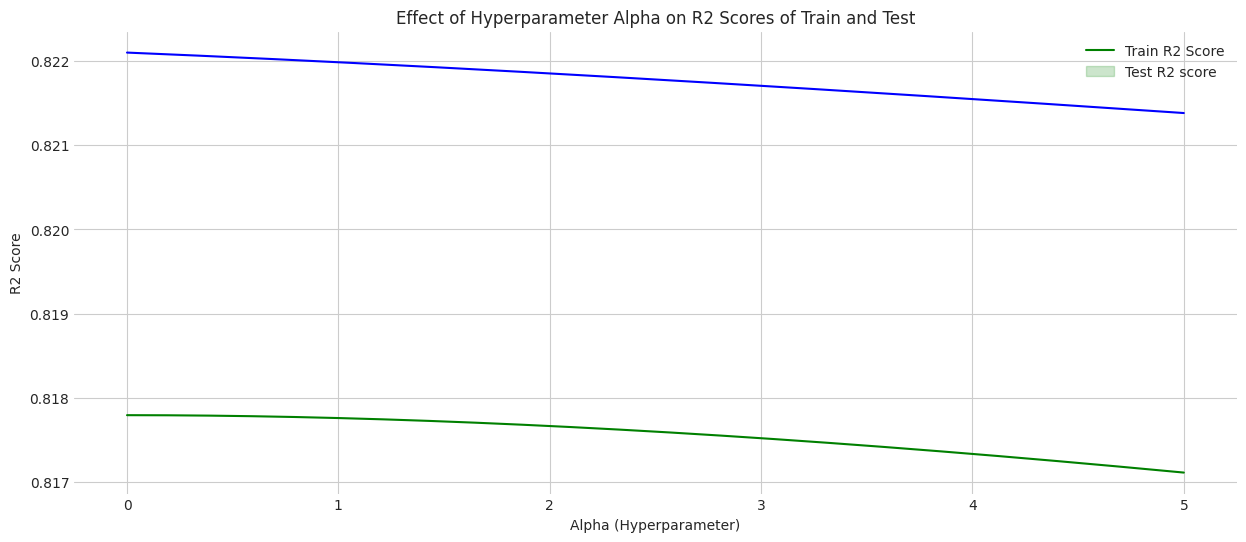

In [64]:
plt.figure(figsize=(15, 6))
sns.lineplot(x=lambdas, y=train_R2_score, color='green')  # Using a specific shade of green
sns.lineplot(x=lambdas, y=test_R2_score, color='blue')    # Using a specific shade of blue
plt.legend(['Train R2 Score', 'Test R2 score'])
plt.title("Effect of Hyperparameter Alpha on R2 Scores of Train and Test")
plt.xlabel("Alpha (Hyperparameter)")
plt.ylabel("R2 Score")
plt.show()

In [65]:
RidgeModel = Ridge(alpha = 0.1)
RidgeModel.fit(X_train,y_train)
trainR2 = RidgeModel.score(X_train,y_train)
testR2 = RidgeModel.score(X_test,y_test)

In [66]:
trainR2,testR2

(0.8177926840425397, 0.822088925726489)

In [67]:
RidgeModel.coef_

array([0.00153708, 0.11619005, 0.02729931, 0.0493736 , 0.00971166])

In [68]:
y_pred = RidgeModel.predict(X_test)

print("MSE:",mean_squared_error(y_test,y_pred)) # MSE
print("RMSE:",np.sqrt(mean_squared_error(y_test,y_pred))) #RMSE
print("MAE :",mean_absolute_error(y_test,y_pred) ) # MAE
print("r2_score:",r2_score(y_test,y_pred)) # r2score
print("Adjusted R2 score :", AdjustedR2score(r2_score(y_test,y_pred),len(X),X.shape[1]))  # adjusted R2 score

MSE: 0.003638281468893302
RMSE: 0.060318168646712925
MAE : 0.04248517639513057
r2_score: 0.822088925726489
Adjusted R2 score : 0.820288206351251


* Model Accuracy was 80.6% earlier but now it has increased to 82% after applying Ridge Regularization.

## Lasso Regularization

In [69]:
## Hyperparameter Tuning : for appropriate lambda value :

train_R2_score = []
test_R2_score = []
lambdas = []
train_test_difference_Of_R2 =  []
lambda_ = 0
while lambda_ <= 5:
    lambdas.append(lambda_)
    LassoModel = Lasso(alpha=lambda_)
    LassoModel.fit(X_train , y_train)
    trainR2 = LassoModel.score(X_train,y_train)
    testR2 = LassoModel.score(X_test,y_test)
    train_R2_score.append(trainR2)
    test_R2_score.append(testR2)

    lambda_ += 0.001

<ipython-input-69-e7ae1d118a4e>:11: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  LassoModel.fit(X_train , y_train)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.182e-01, tolerance: 7.884e-04 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


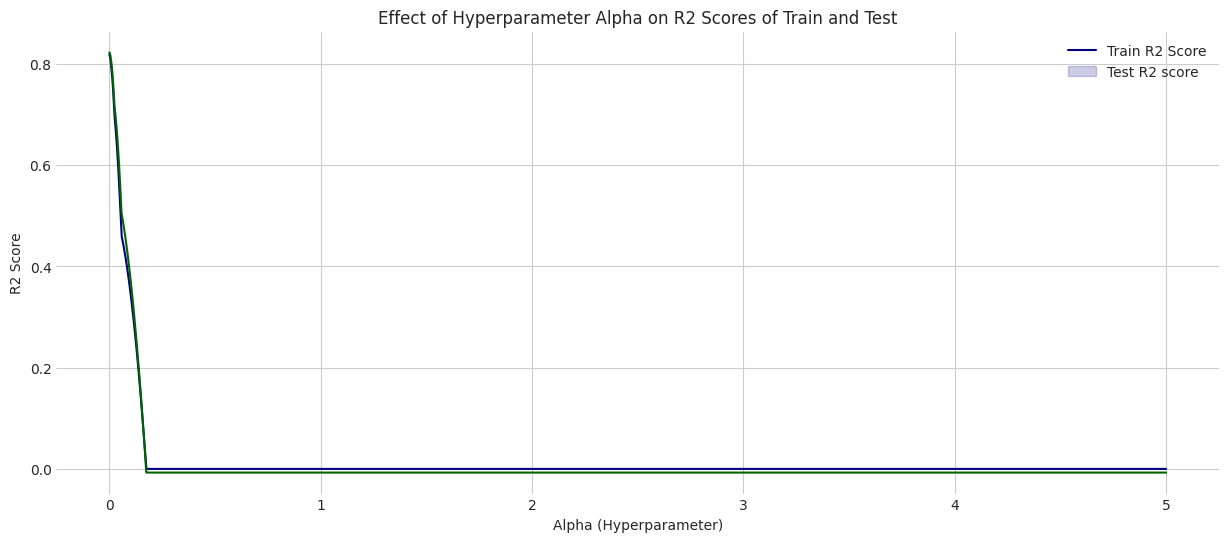

In [70]:
plt.figure(figsize=(15, 6))
sns.lineplot(x = lambdas, y = train_R2_score, color='navy')  # Using a dark shade of blue
sns.lineplot(x = lambdas, y = test_R2_score, color='darkgreen')  # Using a dark shade of green
plt.legend(['Train R2 Score', 'Test R2 score'])
plt.title("Effect of Hyperparameter Alpha on R2 Scores of Train and Test")
plt.xlabel("Alpha (Hyperparameter)")
plt.ylabel("R2 Score")
plt.show()

In [71]:
LassoModel = Lasso(alpha=0.001)
LassoModel.fit(X_train , y_train)
trainR2 = LassoModel.score(X_train,y_train)
testR2 = LassoModel.score(X_test,y_test)

In [72]:
trainR2,testR2

(0.8174848383717302, 0.8222633383023912)

In [73]:
y_pred = LassoModel.predict(X_test)

print("MSE:",mean_squared_error(y_test,y_pred)) # MSE
print("RMSE:",np.sqrt(mean_squared_error(y_test,y_pred))) #RMSE
print("MAE :",mean_absolute_error(y_test,y_pred) ) # MAE
print("r2_score:",r2_score(y_test,y_pred)) # r2score
print("Adjusted R2 score :", AdjustedR2score(r2_score(y_test,y_pred),len(X),X.shape[1]))  # adjusted R2 score

MSE: 0.0036347147317161003
RMSE: 0.06028859537023649
MAE : 0.04239017050992718
r2_score: 0.8222633383023912
Adjusted R2 score : 0.8204643842366259


* Model Accuracy was 80.6% earlier but now it has increased to 82% after applying Lasso Regularization.

## Recommendations
1. The model highlights that CGPA is the most significant predictor for admission chances to Ivy League colleges, followed by Total Score (GRE + TOEFL), indicating the weight of academic performance in the prediction process.
2. Applying Ridge and Lasso Regularization techniques has improved the model's accuracy, with Ridge Regularization achieving the highest accuracy of 82%.
3. Emphasize the importance of maintaining a high CGPA for aspiring Ivy League applicants, as it heavily influences their chance of admission.
4. Encourage applicants to focus not only on academics but also on aspects like Statement of Purpose (SOP), Letters of Recommendation (LOR), and Research Experience, which contribute significantly to the evaluation process.
5. Use the model predictions to strategically enhance areas that contribute most to admission chances, such as improving CGPA or strengthening SOP and LOR.
6. Provide valuable insights to admissions committees regarding the relative importance of different factors in evaluating applicants, aiding in more informed decision-making.